In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
soda = pd.read_csv('data_code/item.csv') # check your relative path. If you are rusty on relative and absolute path, check the Unix shell lesson: https://swcarpentry.github.io/shell-novice/02-filedir/index.html
inv = pd.read_csv('data_code/invoice.csv')

In [3]:
# t-test
# tell whether two cateogries of soda (cola and energy drinks) have "statistically significant" difference in sales

In [4]:
# what we need are sales data of cola and energy drinks

In [5]:
inv_soda = inv.merge(soda, how='outer', right_on='Item_id', left_on="Item_id") # create a complete sheet using inv and soda dataframe

In [6]:
ct = inv_soda.groupby(['Item_Description','Category'], as_index=False).agg({'Bottles_Sold': "sum"}) # get total bottles solde, by both "Item Description" and "Category"

In [7]:
ct_eng = ct[ct['Category'] == 'Energy Drink'] # get sales of soft drinks in the "energy drink" category
ct_cola = ct[ct['Category'] == 'Cola'] # get sales of soft drinks in the "cola" category

In [8]:
stats.ttest_ind(ct_eng['Bottles_Sold'],ct_cola['Bottles_Sold'], equal_var=False) # perform t test

Ttest_indResult(statistic=1.9035249229837687, pvalue=0.05748090367978686)

In [9]:
# p is slightly bigger than 0.05. We cannot reject our null hypothesis that those two categories of soft drinks have different sales

In [10]:
# however, recall the video on t test
# conditions for using t test to determine whether two groups have statistically significant difference are:
# both groups obeys normal distribution
# they should have similar variance (square of the standard deviation)
# they should have about the same number of data points, in the range of 20 to 30

In [11]:
len(ct_eng) # check number of data points in the energy drink category

339

In [12]:
len(ct_cola) # check number of data points in the cola category

251

In [13]:
# both are beyond the 20 to 30 range

Text(0, 0.5, 'Count')

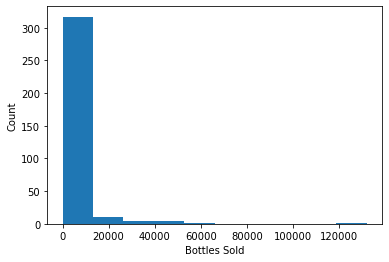

In [14]:
plt.hist(ct_eng['Bottles_Sold']) # also check the distribution of the data by plotting a histogram
plt.xlabel('Bottles Sold')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

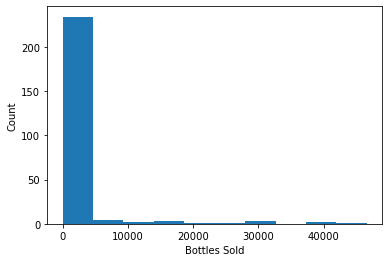

In [15]:
plt.hist(ct_cola['Bottles_Sold'])
plt.xlabel('Bottles Sold')
plt.ylabel('Count')

In [ ]:
# The histograms do not have the bell shape. There are a few drinks that sells large quantity, but many drinks sells only small quantities.
# In conclusion, using t-test to tell whether two cateogries of soft drinks have the same sales is not appropriate here.